In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Image
import matplotlib.patches as mpatches
from collections import deque
import time
import cv2

In [2]:
%matplotlib inline

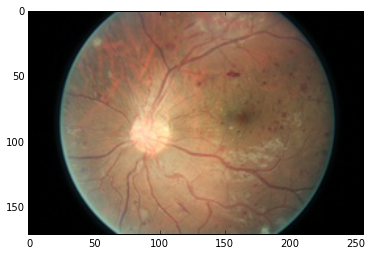

In [3]:
#input_image = plt.imread('train_pic/10003_left.jpeg')
#input_image = plt.imread('train96/10003_left.jpeg')
input_image = plt.imread('train256/16_right.jpeg')
plt.imshow(input_image)
plt.show()

In [4]:
# test opencv
input_image_cv = cv2.imread('train256/16_right.jpeg', 1)
#input_image_cv = cv2.imread('train256/16_right.jpeg', cv2.CV_LOAD_IMAGE_COLOR)
cv2.imshow('image',input_image_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()


segments: 2816
0.984967947006


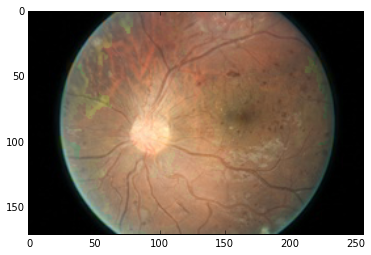

In [10]:
# test opencv
#c_input_image_cv = cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2HSV)
c_input_image_cv = cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2HLS)
#cv2.imshow('image',cv2.cvtColor(c_input_image_cv, cv2.COLOR_HSV2BGR))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

start = time.time()
segment_res, res_pic_hsv, segment_counter = flood_fill_hsv(c_input_image_cv, 200)
print "segments:",segment_counter
print time.time() - start
res_pic_rbg = cv2.cvtColor(res_pic_hsv, cv2.COLOR_HLS2RGB)
#cv2.imshow('image',res_pic_rbg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(res_pic_rbg)
plt.show()

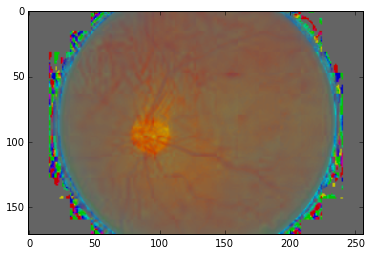

In [34]:
input_image_cv = cv2.imread('train256/16_right.jpeg', 1)
input_image_hls = cv2.cvtColor(input_image_cv, cv2.COLOR_BGR2HLS)
res_pic_hls = full_saturation_hls(input_image_hls)
res_pic_rbg = cv2.cvtColor(res_pic_hls, cv2.COLOR_HLS2RGB)
plt.imshow(res_pic_rbg)
plt.show()

In [37]:
input_image_hls[100][200]

array([16, 96, 66], dtype=uint8)

In [33]:
def full_saturation_hls(input_image):
    res_pic = np.array(input_image)
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            res_pic[i][j][1] = 100
    return res_pic

In [6]:
def flood_fill_hsv(input_image, threshold):
    segment_counter = 0
    segment_res = np.zeros((input_image.shape[0], input_image.shape[1]), dtype=np.uint64)
    color_mean = []
    #debug
    #print segment_res.shape
    #covered_pixel = 0
    #debug
    direction = [(0, -1), (0, 1), (1, 0), (-1, 0)]
    x = input_image.shape[0]
    y = input_image.shape[1]
    
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            if (segment_res[i][j] == 0):
                queue_list = deque([(i, j)])
                segment_counter = segment_counter + 1
                segment_res[i][j] = segment_counter
                #regeion_color0 = [input_image[i][j][0]]
                #regeion_color1 = [input_image[i][j][1]]
                #regeion_color2 = [input_image[i][j][2]]
                c0_sum = long(input_image[i][j][0])
                c0_num = long(1)
                #while (len(queue_list) > 0):
                #start = time.time()
                while queue_list:
                    center_i, center_j = queue_list.popleft()
                    #center_i = queue_list[0][0]
                    #center_j = queue_list[0][1]
                    #for new_i in range(center_i - 1, center_i + 2):
                        #for new_j in range(center_j - 1, center_j + 2):
                    for dirc in direction:
                        new_i = center_i + dirc[0]
                        new_j = center_j + dirc[1]
                        if (new_i >= 0 and new_i < x and new_j >= 0 and new_j < y and segment_res[new_i][new_j] == 0):
                            delta0 = input_image[center_i][center_j][0] - input_image[new_i][new_j][0]
                            color_distance = (delta0 ** 2)
                            if (color_distance <= threshold):
                                queue_list.append((new_i, new_j))
                                segment_res[new_i][new_j] = segment_counter
                                #regeion_color0.append(input_image[new_i][new_j][0])
                                #regeion_color1.append(input_image[new_i][new_j][1])
                                #regeion_color2.append(input_image[new_i][new_j][2])
                                c0_sum += input_image[new_i][new_j][0]
                                c0_num += 1
                                #
                                #covered_pixel = covered_pixel + 1
                                #
                    #queue_list.popleft()
                #print "1",time.time() - start
                #start = time.time()
                #color_mean.append((pd.Series(regeion_color0).median(), pd.Series(regeion_color1).median(), pd.Series(regeion_color2).median()))
                #color_mean.append((int(np.array(regeion_color0).mean()), int(np.array(regeion_color1).mean()), int(np.array(regeion_color2).mean())))
                color_mean.append(int(c0_sum/c0_num))
                #print "2",time.time() - start

    #res_pic = np.zeros(input_image.shape, dtype = np.uint8)
    res_pic = np.array(input_image)
    for i in range(x):
        for j in range(y):
            res_pic[i][j][0] = color_mean[int(segment_res[i][j] - 1)]

    return segment_res, res_pic, segment_counter

In [23]:
def flood_fill(input_image, threshold):
    segment_counter = 0
    segment_res = np.zeros((input_image.shape[0], input_image.shape[1]), dtype=np.uint64)
    color_mean = []
    #debug
    #print segment_res.shape
    #covered_pixel = 0
    #debug
    direction = [(0, -1), (0, 1), (1, 0), (-1, 0)]
    x = input_image.shape[0]
    y = input_image.shape[1]
    
    for i in range(input_image.shape[0]):
        for j in range(input_image.shape[1]):
            if (segment_res[i][j] == 0):
                queue_list = deque([(i, j)])
                segment_counter = segment_counter + 1
                segment_res[i][j] = segment_counter
                #regeion_color0 = [input_image[i][j][0]]
                #regeion_color1 = [input_image[i][j][1]]
                #regeion_color2 = [input_image[i][j][2]]
                c0_sum = long(input_image[i][j][0])
                c0_num = long(1)
                c1_sum = long(input_image[i][j][1])
                c1_num = long(1)
                c2_sum = long(input_image[i][j][2])
                c2_num = long(1)
                #while (len(queue_list) > 0):
                #start = time.time()
                while queue_list:
                    center_i, center_j = queue_list.popleft()
                    #center_i = queue_list[0][0]
                    #center_j = queue_list[0][1]
                    #for new_i in range(center_i - 1, center_i + 2):
                        #for new_j in range(center_j - 1, center_j + 2):
                    for dirc in direction:
                        new_i = center_i + dirc[0]
                        new_j = center_j + dirc[1]
                        if (new_i >= 0 and new_i < x and new_j >= 0 and new_j < y and segment_res[new_i][new_j] == 0):
                            delta0 = input_image[center_i][center_j][0] - input_image[new_i][new_j][0]
                            delta1 = input_image[center_i][center_j][1] - input_image[new_i][new_j][1]
                            delta2 = input_image[center_i][center_j][2] - input_image[new_i][new_j][2]
                            color_distance = (delta0 ** 2) + (delta1 ** 2) + (delta2 ** 2)
                            if (color_distance <= threshold):
                                queue_list.append((new_i, new_j))
                                segment_res[new_i][new_j] = segment_counter
                                #regeion_color0.append(input_image[new_i][new_j][0])
                                #regeion_color1.append(input_image[new_i][new_j][1])
                                #regeion_color2.append(input_image[new_i][new_j][2])
                                c0_sum += input_image[new_i][new_j][0]
                                c0_num += 1
                                c1_sum += input_image[new_i][new_j][1]
                                c1_num += 1
                                c2_sum += input_image[new_i][new_j][2]
                                c2_num += 1
                                #
                                #covered_pixel = covered_pixel + 1
                                #
                    #queue_list.popleft()
                #print "1",time.time() - start
                #start = time.time()
                #color_mean.append((pd.Series(regeion_color0).median(), pd.Series(regeion_color1).median(), pd.Series(regeion_color2).median()))
                #color_mean.append((int(np.array(regeion_color0).mean()), int(np.array(regeion_color1).mean()), int(np.array(regeion_color2).mean())))
                color_mean.append((int(c0_sum/c0_num), int(c1_sum/c1_num), int(c2_sum/c2_num)))
                #print "2",time.time() - start

    res_pic = np.zeros(input_image.shape, dtype = np.uint8)
    for i in range(x):
        for j in range(y):
            res_pic[i][j][0] = color_mean[int(segment_res[i][j] - 1)][0]
            res_pic[i][j][1] = color_mean[int(segment_res[i][j] - 1)][1]
            res_pic[i][j][2] = color_mean[int(segment_res[i][j] - 1)][2]

    return segment_res, res_pic, segment_counter

1.90031599998


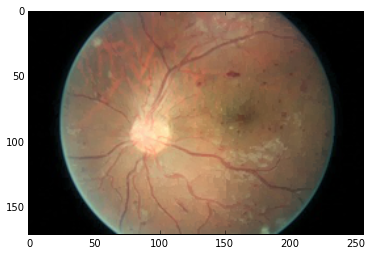

In [24]:
start = time.time()
segment_res, res_pic, segment_counter = flood_fill(input_image, 100)
print time.time() - start
plt.imshow(res_pic)
plt.show()

In [129]:
print segment_counter

15950


In [23]:
input_image[1000][2000]

array([202, 174, 134], dtype=uint8)

In [28]:
np.zeros((5, 5), dtype=np.uint64)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint64)